<a href="https://colab.research.google.com/github/apk-bumble/ml-code-open/blob/main/mfml-assignment2-q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1) Write a code to implement the three versions of the gradient descent
namely. vanilla gradient descent, mini batch gradient descent and stochastic gradient descent for a data set consisting of at least 1500 rows and 15
columns.

Write the necessary theory and experiment on the convergence
using the optimal batch size for the mini batch method.

In [8]:
from google.colab import files
import pandas as pd
import numpy as np
import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Datasets/"

#Read data from csv file
df = pd.read_csv(path + "BankChurners-Cleaned.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,716053083,33,2,21,2,2,4,27992.0,0,27992.0,0.433,837,18,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,710231433,56,1,43,5,1,4,3110.0,2378,732.0,0.974,3395,75,0.829,0.765
2996,817960533,41,4,36,5,3,2,1734.0,857,877.0,0.752,4741,84,0.714,0.494
2997,713431008,46,5,36,5,3,0,3562.0,0,3562.0,0.753,4198,77,0.750,0.000
2998,709663608,43,1,36,4,2,4,1536.0,0,1536.0,0.571,1973,36,0.333,0.000


In [13]:
print("The initial shape of data is: ", df.shape)

The initial shape of data is:  (3000, 15)


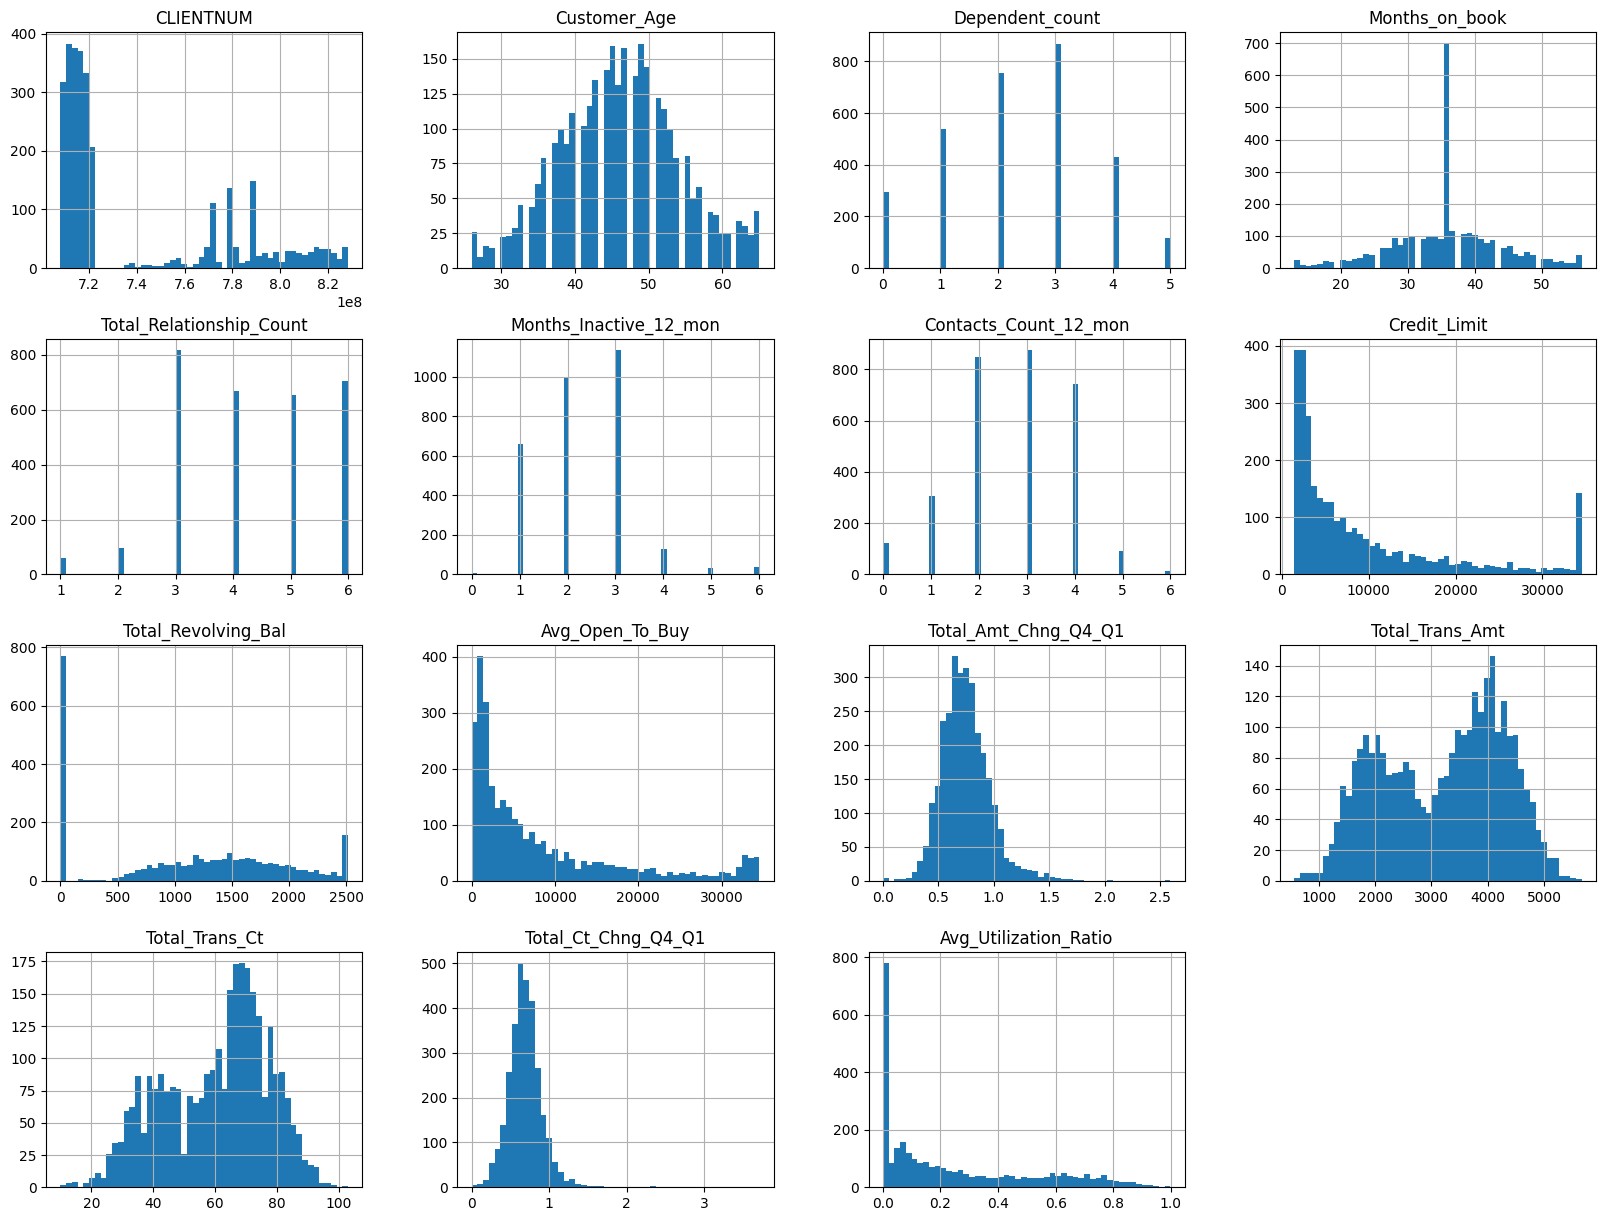

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [18]:
selected_columns = df[["CLIENTNUM","Customer_Age","Months_Inactive_12_mon","Total_Revolving_Bal","Avg_Open_To_Buy","Total_Amt_Chng_Q4_Q1","Total_Trans_Ct","Total_Amt_Chng_Q4_Q1"]]

X_df = selected_columns.copy().dropna()

#Convert the X_df into numpy array
X = X_df.to_numpy()

print(X_df)
# print(X)
# print(X.shape)

      CLIENTNUM  Customer_Age  Months_Inactive_12_mon  Total_Revolving_Bal  \
0     768805383            45                       1                  777   
1     818770008            49                       1                  864   
2     713982108            51                       1                    0   
3     769911858            40                       4                 2517   
4     716053083            33                       2                    0   
...         ...           ...                     ...                  ...   
2995  710231433            56                       1                 2378   
2996  817960533            41                       3                  857   
2997  713431008            46                       3                    0   
2998  709663608            43                       2                    0   
2999  754851783            39                       2                 2218   

      Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Ct  \


In [19]:
selected_columns = df[["Avg_Utilization_Ratio"]]

Y_df = selected_columns.copy().dropna()

Y = Y_df.to_numpy()

print(Y_df)
# print(Y)
# print(Y.shape)

      Avg_Utilization_Ratio
0                     0.061
1                     0.105
2                     0.000
3                     0.760
4                     0.000
...                     ...
2995                  0.765
2996                  0.494
2997                  0.000
2998                  0.000
2999                  0.116

[3000 rows x 1 columns]


In [20]:
x_train, x_test , y_train, y_test = train_test_split(X_df, Y_df, test_size=0.2, random_state=42, shuffle=True)

print("Shape of X_train: ",x_train.shape)
print("Shape of Y_train: ",y_train.shape)
print("Shape of X_test: ",x_test.shape)
print("Shape of X_test: ",y_test.shape)

Shape of X_train:  (2400, 8)
Shape of Y_train:  (2400, 1)
Shape of X_test:  (600, 8)
Shape of X_test:  (600, 1)


Text(0, 0.5, '$y$')

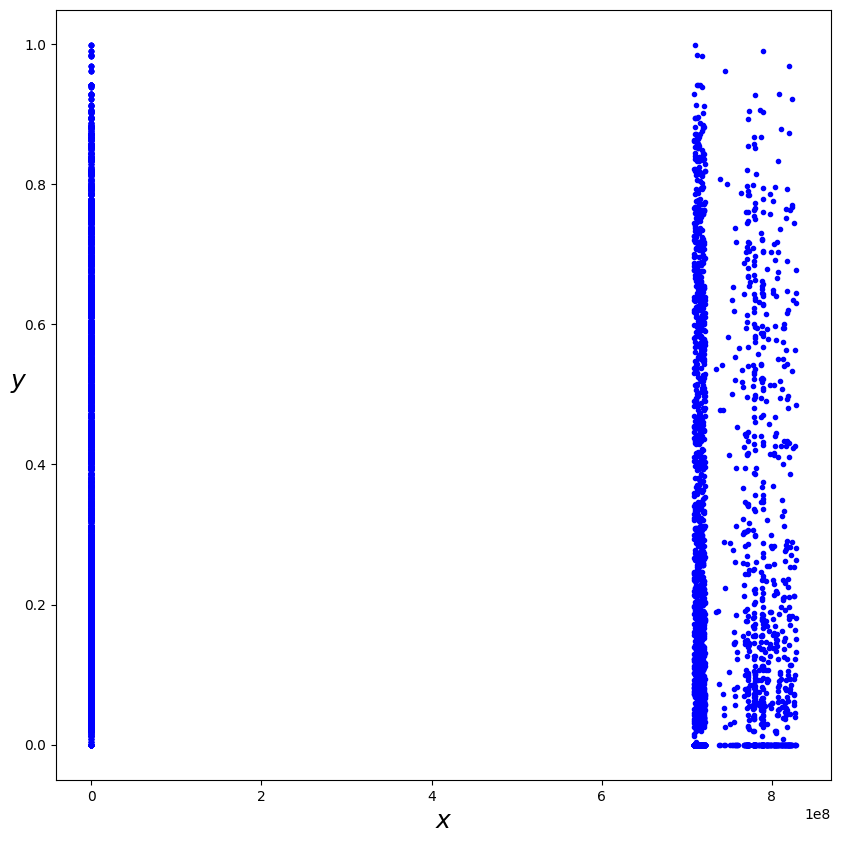

In [21]:
plt.figure(figsize=(10,10))
plt.plot(x_train,y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [22]:
#Convert our data into numpy arrays after splitting them.
X_train = x_train.to_numpy()
X_test = x_test.to_numpy()
Y_train = y_train.to_numpy()
Y_test = y_test.to_numpy()

#Scale our data in order to ensure that all features have a similar scale.
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)

(2400, 8)


Text(0, 0.5, '$y$')

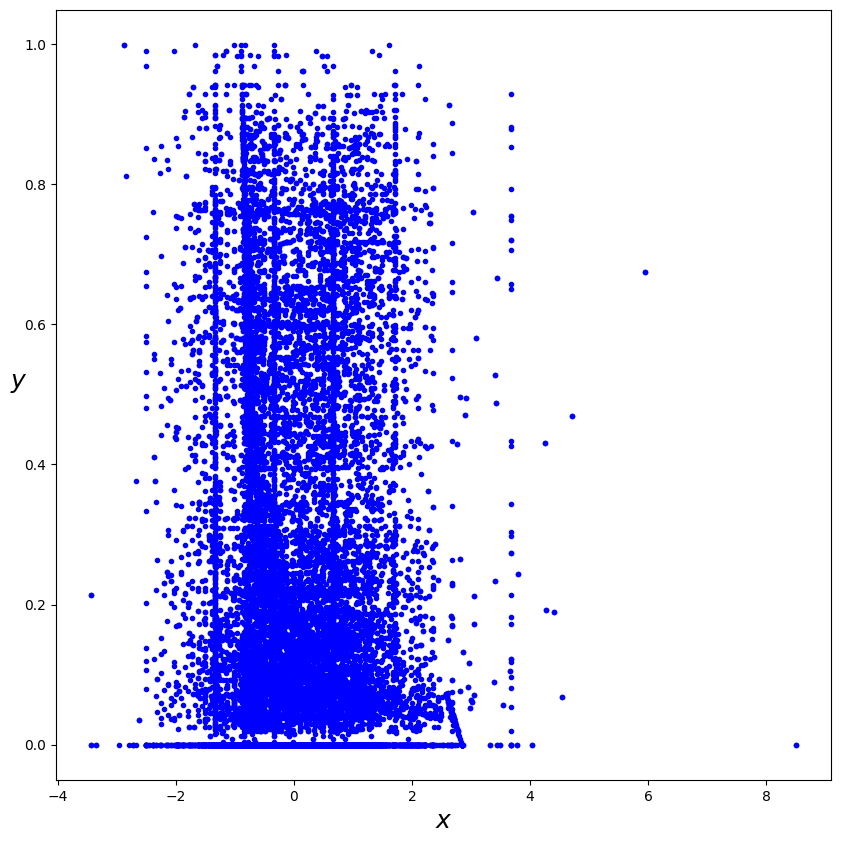

In [23]:
plt.figure(figsize=(10,10))
plt.plot(X_train,Y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

In [24]:
#Add in first column ones for bias.
X_train =  np.c_[np.ones((len(X_train),1)),X_train]
X_test = np.c_[np.ones((len(X_test),1)),X_test]
print(X_train.shape)


(2400, 9)


In [25]:
class LinearRegression():

  def __init__( self, learning_rate, iterations):

    self.learning_rate = learning_rate
    self.iterations = iterations

  def calculate_cost(self,X,Y):
    m = X.shape[0]

    predictions = self.predict(X)

    cost = (1/m)*np.sum(np.square(predictions-Y))

    return cost

	# Function for model training
  def fit_Batch_Gradient_Descent(self, X, Y) :
    self.X = X
    #no_of_training_examples, no_of_features
    self.m, self.n = self.X.shape

    # weight random initialization
    self.W = np.random.randn(self.n,1)

    self.Y = Y

    self.cost_history = np.zeros(self.iterations)

    for i in range( self.iterations ):
      self.update_weights_Batch_Gradient_Descent(i)
    return self

  # Helper function to update weights in gradient descent
  def update_weights_Batch_Gradient_Descent(self,i):

    #Compute the hypothetical function h(x)
    Y_pred = self.predict(self.X)

    # calculate gradients
    dW = (2/self.m)*(np.dot(self.X.T,(Y_pred-self.Y)))

    # update weights
    self.W = self.W - self.learning_rate * dW
    # update the history of costs
    self.cost_history[i]  = self.calculate_cost(self.X,self.Y)

    return self


  def fit_Stochastic_Gradient_Descent(self, X, Y, batch_size=1):
    self.X = X
    self.m, self.n = self.X.shape

    self.Y = Y

    self.W = np.random.randn(self.n,1)*0.01

    self.cost_history = np.zeros((self.iterations,1))

    for iteration in range(self.iterations):
      cost = 0.0
      for i in range(batch_size):
        random_index = np.random.randint(0,self.m)
        xi = self.X[random_index:random_index+1]
        yi = self.Y[random_index:random_index+1]
        self.update_weights_Stochastic_Gradient_Descent(xi,yi,i,iteration)
        cost += self.calculate_cost(xi,yi)
      self.cost_history[iteration]  = cost

    return self

  # Helper function to update weights in gradient descent
  def update_weights_Stochastic_Gradient_Descent(self,xi,yi,i,iteration):

    Y_pred = self.predict(xi)

    dW = (2/xi.shape[0])*(np.dot(xi.T,(Y_pred-yi)))
    self.W = self.W - self.learning_rate * dW

    return self

  def fit_Mini_Batch_Gradient_Descent(self, X, Y, batch_size=20):
    self.X = X
    self.m, self.n = self.X.shape

    self.Y = Y

    self.W = np.random.randn(self.n,1)*0.01  #random initialization

    self.cost_history = np.zeros((self.iterations,1))

    for iteration in range(self.iterations):
      cost = 0.0
      for i in range(batch_size):
        random_index = np.random.randint(0,self.m)
        xi = self.X[random_index:random_index+1]
        yi = self.Y[random_index:random_index+1]
        self.update_weights_Stochastic_Gradient_Descent(xi,yi,i,iteration)
        cost += self.calculate_cost(xi,yi)
      self.cost_history[iteration]  = cost

    return self

  # Helper function to update weights in gradient descent
  def update_weights_Mini_Batch_Gradient_Descent(self,xi,yi,i):

    Y_pred = self.predict(xi)

    dW = (2/xi.shape[0])*(np.dot(xi.T,(Y_pred-yi)))
    self.W = self.W - self.learning_rate * dW

    return self

  #Hypothetical function h(x)
  def predict(self, X):
    return np.dot(X,self.W)

In [26]:
model_batch = LinearRegression( iterations = 1000, learning_rate = 0.01)
model_batch.fit_Batch_Gradient_Descent( X_train, y_train )

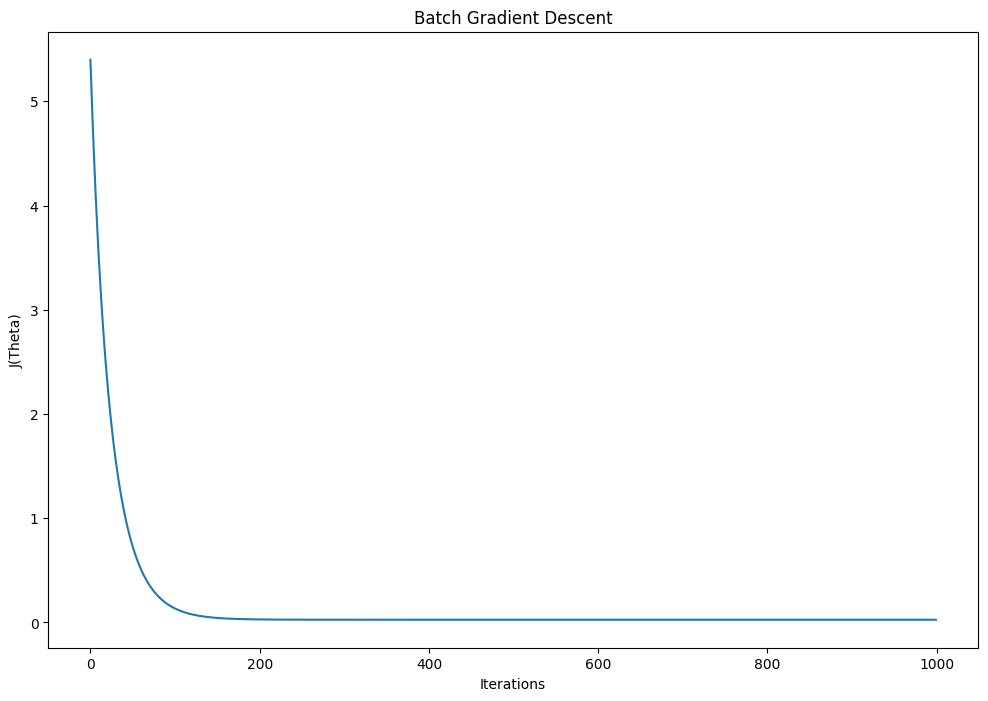

In [27]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_title('Batch Gradient Descent')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
plt.plot(range(model_batch.iterations),model_batch.cost_history,'-')

In [28]:
model_stochastic = LinearRegression(iterations = 1000, learning_rate = 0.001)
model_stochastic.fit_Stochastic_Gradient_Descent( X_train, y_train )

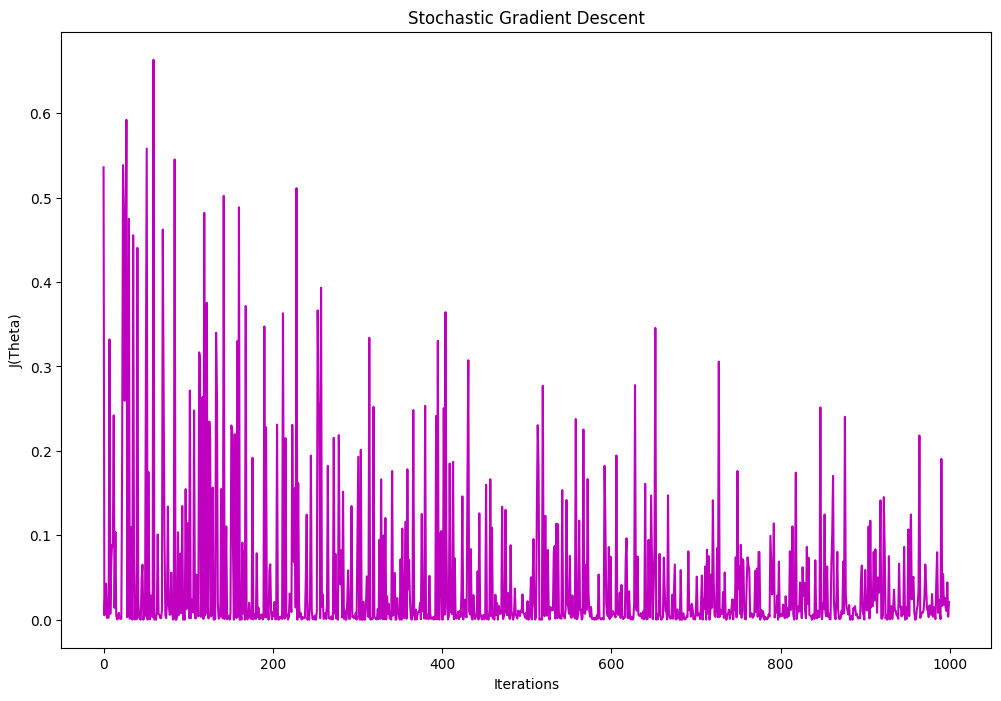

In [29]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_title('Stochastic Gradient Descent')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
plt.plot(range(model_stochastic.iterations),model_stochastic.cost_history,'-m')

In [30]:
model_mini_batch = LinearRegression( iterations = 1000, learning_rate = 0.0001)
model_mini_batch.fit_Mini_Batch_Gradient_Descent( X_train, y_train )

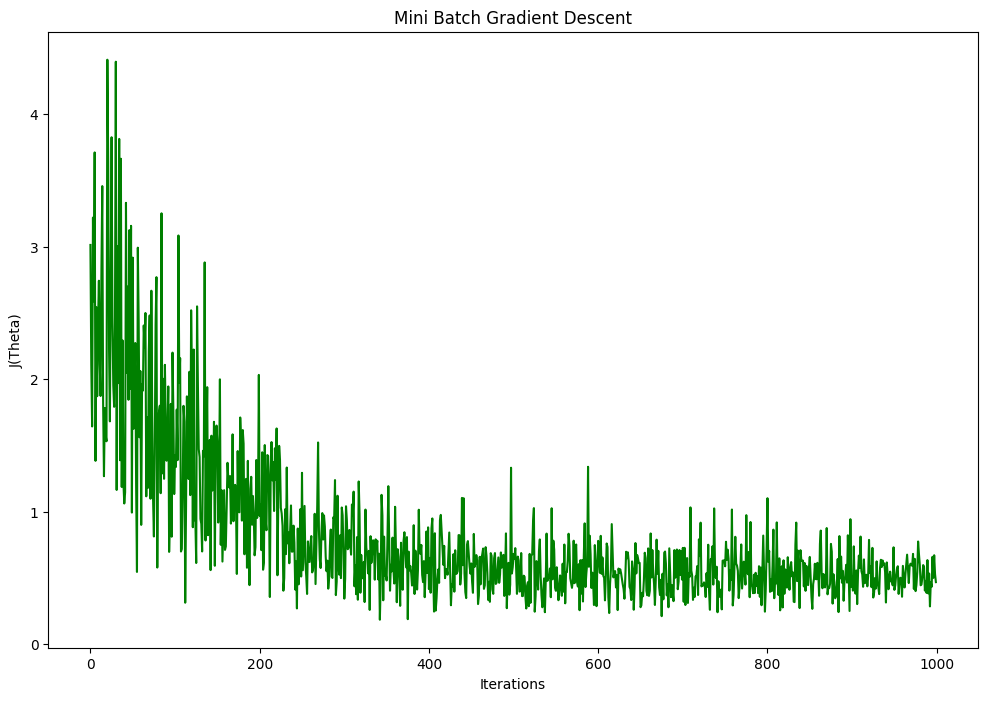

In [31]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_title('Mini Batch Gradient Descent')
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
plt.plot(range(model_mini_batch.iterations),model_mini_batch.cost_history,'-g')